In [1]:
import os
import sys
import time
sys.path.append(os.pardir)
from utils.data import create_image_dataframe, ImageGenerator, show_prediction, show_batch
from configs.image import GRAY_IMAGE_SIZE3

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D

/home/oattao/virtual_envs/job/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data_dir = '../data/croped_images/02_HOOD'
image_frame = create_image_dataframe(data_dir)
generator = ImageGenerator(df=image_frame, label_col='CarModel', shuffle=True)

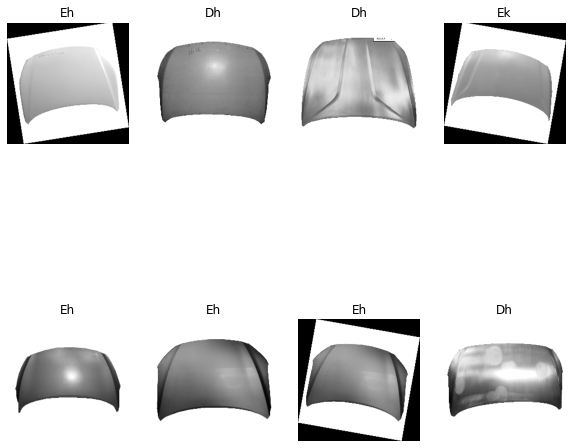

In [3]:
x, y, n = generator.__getitem__(0)
show_batch(x, y)

In [7]:
model = Sequential([
    Conv2D(8, 3, padding='same', activation='relu', input_shape=GRAY_IMAGE_SIZE3),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')])

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [8]:
start = time.time()
history_side = model.fit(generator, epochs=30, verbose=1)
end = time.time() - start
print(end)

Train for 9 steps
Epoch 1/30
9/9 [==============================] - 1s 127ms/step - loss: 1.3446 - accuracy: 0.3857
Epoch 2/30
9/9 [==============================] - 1s 101ms/step - loss: 1.0953 - accuracy: 0.6000
Epoch 3/30
9/9 [==============================] - 1s 100ms/step - loss: 0.8014 - accuracy: 0.6714
Epoch 4/30
9/9 [==============================] - 1s 100ms/step - loss: 0.5757 - accuracy: 0.7714
Epoch 5/30
9/9 [==============================] - 1s 101ms/step - loss: 0.3903 - accuracy: 0.7857
Epoch 6/30
9/9 [==============================] - 1s 99ms/step - loss: 0.4486 - accuracy: 0.8857
Epoch 7/30
9/9 [==============================] - 1s 100ms/step - loss: 0.3280 - accuracy: 0.8571
Epoch 8/30
9/9 [==============================] - 1s 99ms/step - loss: 0.2124 - accuracy: 0.9429
Epoch 9/30
9/9 [==============================] - 1s 101ms/step - loss: 0.1255 - accuracy: 0.9571
Epoch 10/30
9/9 [==============================] - 1s 103ms/step - loss: 0.0921 - accuracy: 0.9857
Epo

Prediction Car model: EK, True Car model: DK
Detail confident in percent (%):
Model: EH, Confident: 0.0
Model: EK, Confident: 85.7
Model: DH, Confident: 14.3
Model: DK, Confident: 0.0


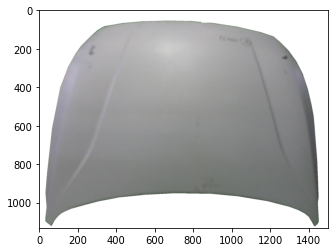

In [12]:
import pathlib
testdir = '../data/sample_images/hoodtest'
testdir = pathlib.Path(testdir)
testlist = list(testdir.glob('*.*'))
show_prediction(model, str(testlist[4]), ins=True)

In [13]:
model.save('./trained_models/no_augument.h5')
reconstructed_model = tf.keras.models.load_model('./trained_models/no_augument.h5')